In [12]:
import pandas as pd
df=pd.read_csv("kidney-stone-dataset.csv")

In [13]:
df

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


<Axes: ylabel='ph'>

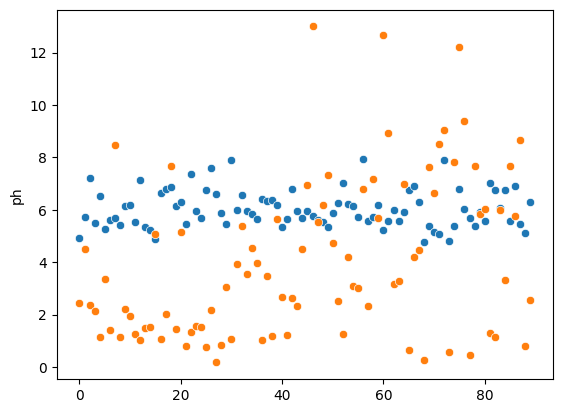

In [14]:
import seaborn as sns
sns.scatterplot(df["ph"])
sns.scatterplot(df["calc"])



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [16]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [17]:
x

,gravity,ph,osmo,cond,urea,calc
0,1.021000,4.910000,725,14.000000,443,2.450000
1,1.017000,5.740000,577,20.000000,296,4.490000
2,1.008000,7.200000,321,14.900000,101,2.360000
3,1.011000,5.510000,408,12.600000,224,2.150000
4,1.005000,6.520000,187,7.500000,91,1.160000
...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120
86,1.016501,6.900257,549,20.549790,204,5.775256
87,1.032754,5.443491,1085,23.188653,576,8.664169
88,1.023870,5.106433,325,12.124689,50,0.781620


In [18]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [19]:
x_S=std.fit_transform(x)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_S,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=25)

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25)

In [23]:
model.score(x_test, y_test)

0.8333333333333334

In [24]:
pred = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[6, 1],
       [2, 9]], dtype=int64)

<Axes: ylabel='target'>

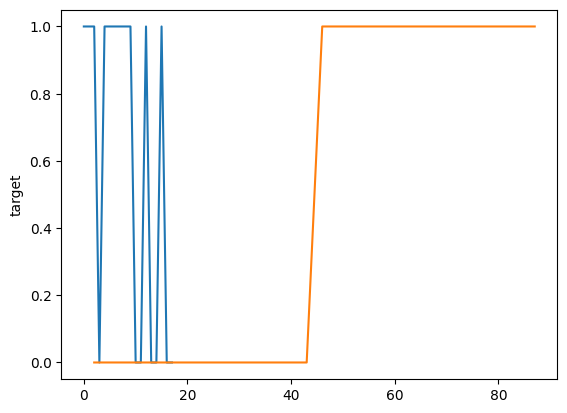

In [26]:
import seaborn as sns
sns.lineplot(pred)

sns.lineplot(y_test)

In [27]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']